### Imports

In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import classification_report

### Data Reading

In [223]:
df=pd.read_csv('D:\Kaggle Competitions\Customer Churn Prediction\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [224]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Exploratory Data Analysis and Data cleaning

In [225]:
for i in df.columns:
    print(f"{i}     Unique values:- {df[f'{i}'].unique()}")

customerID     Unique values:- ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender     Unique values:- ['Female' 'Male']
SeniorCitizen     Unique values:- [0 1]
Partner     Unique values:- ['Yes' 'No']
Dependents     Unique values:- ['No' 'Yes']
tenure     Unique values:- [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService     Unique values:- ['No' 'Yes']
MultipleLines     Unique values:- ['No phone service' 'No' 'Yes']
InternetService     Unique values:- ['DSL' 'Fiber optic' 'No']
OnlineSecurity     Unique values:- ['No' 'Yes' 'No internet service']
OnlineBackup     Unique values:- ['Yes' 'No' 'No internet service']
DeviceProtection     Unique values:- ['No' 'Yes' 'No internet service']
TechSupport     Unique values:- ['No' 'Yes' 'No internet service']
StreamingTV

The data set contains 19 independent variables, which can be classified into 3 groups:

(1) Demographic Information

gender: Whether the client is a female or a male (Female, Male).

SeniorCitizen: Whether the client is a senior citizen or not ( 0, 1).

Partner: Whether the client has a partner or not (Yes, No).

Dependents: Whether the client has dependents or not (Yes, No).


(2) Customer Account Information

tenure: Number of months the customer has stayed with the company (Multiple different numeric values).

Contract: Indicates the customer’s current contract type (Month-to-Month, One year, Two year).

PaperlessBilling: Whether the client has paperless billing or not (Yes, No).

PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic)).

MontlyCharges: The amount charged to the customer monthly (Multiple different numeric values).

TotalCharges: The total amount charged to the customer (Multiple different numeric values).


(3) Services Information

PhoneService: Whether the client has a phone service or not (Yes, No).

MultipleLines: Whether the client has multiple lines or not (No phone service, No, Yes).

InternetServices: Whether the client is subscribed to Internet service with the company (DSL, Fiber optic, No).

OnlineSecurity: Whether the client has online security or not (No internet service, No, Yes).

OnlineBackup: Whether the client has online backup or not (No internet service, No, Yes).

DeviceProtection: Whether the client has device protection or not (No internet service, No, Yes).

TechSupport: Whether the client has tech support or not (No internet service, No, Yes).

StreamingTV: Whether the client has streaming TV or not (No internet service, No, Yes).

StreamingMovies: Whether the client has streaming movies or not (No internet service, No, Yes).

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Missing values

In [227]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The column total charges is wrongly considered as object. So we will make it as numeric

In [228]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [230]:
df.dropna(inplace=True)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [232]:
df.drop(columns=['customerID'],inplace=True,axis=1)

In [233]:
df['PaymentMethod']=df['PaymentMethod'].apply(lambda x: str(x).replace(' (automatic)',''))

### Data Visualization

Text(0.5, 1.0, 'Churn Distribution over dataset')

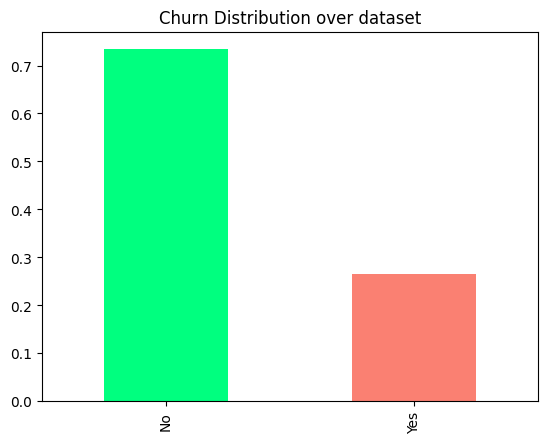

In [234]:
churn_count=df['Churn'].value_counts(normalize=True)
churn_count.plot(kind='bar',color=['springgreen','salmon'])
plt.title('Churn Distribution over dataset')

In [235]:
def percentage_stacked_plot(columns_to_plot, super_title):
    
    '''
    Prints a 100% stacked plot of the response variable for independent variable of the list columns_to_plot.

            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization

            Returns:
                    None
    '''
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(df[column], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=['springgreen','salmon'])

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

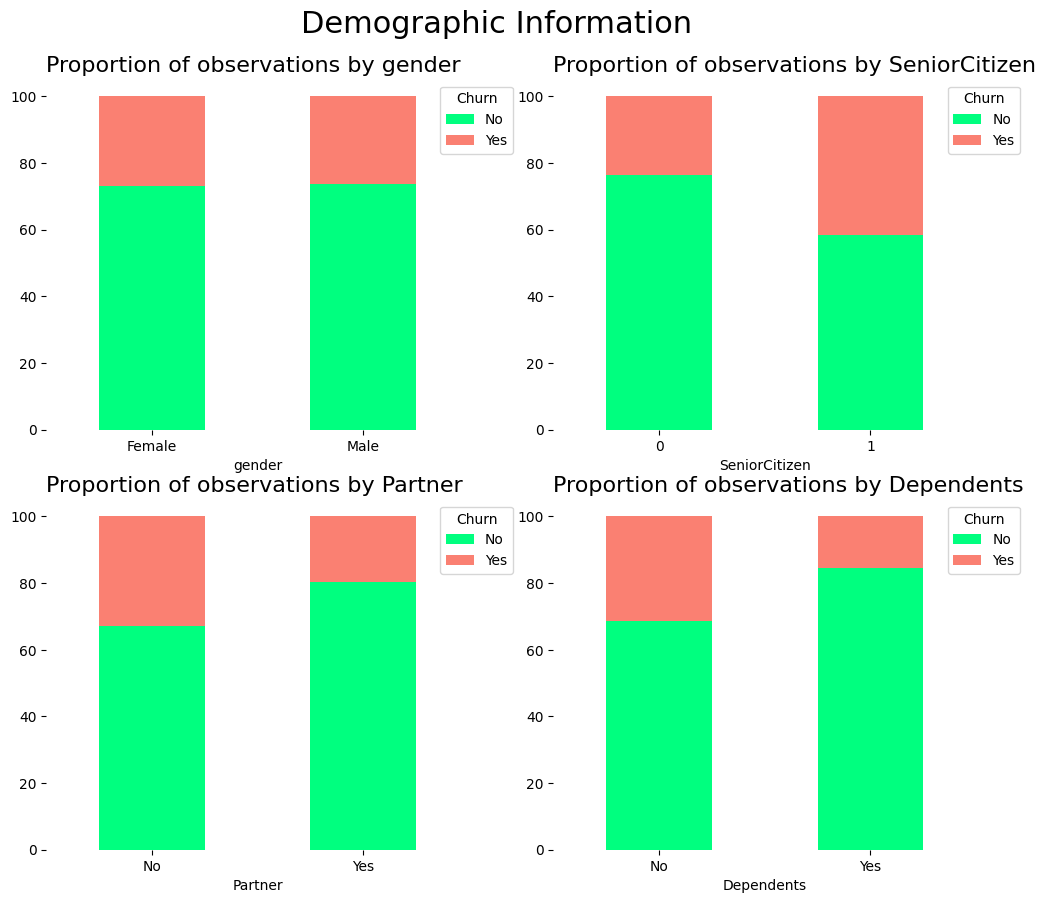

In [236]:
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Demographic Information')

We can extract the following conclusions by analyzing demographic attributes:



The churn rate of senior citizens is almost double that of young citizens.

We do not expect gender to have significant predictive power. A similar percentage of churn is shown both when a customer is a man or a woman.

Customers with a partner churn less than customers with no partner.

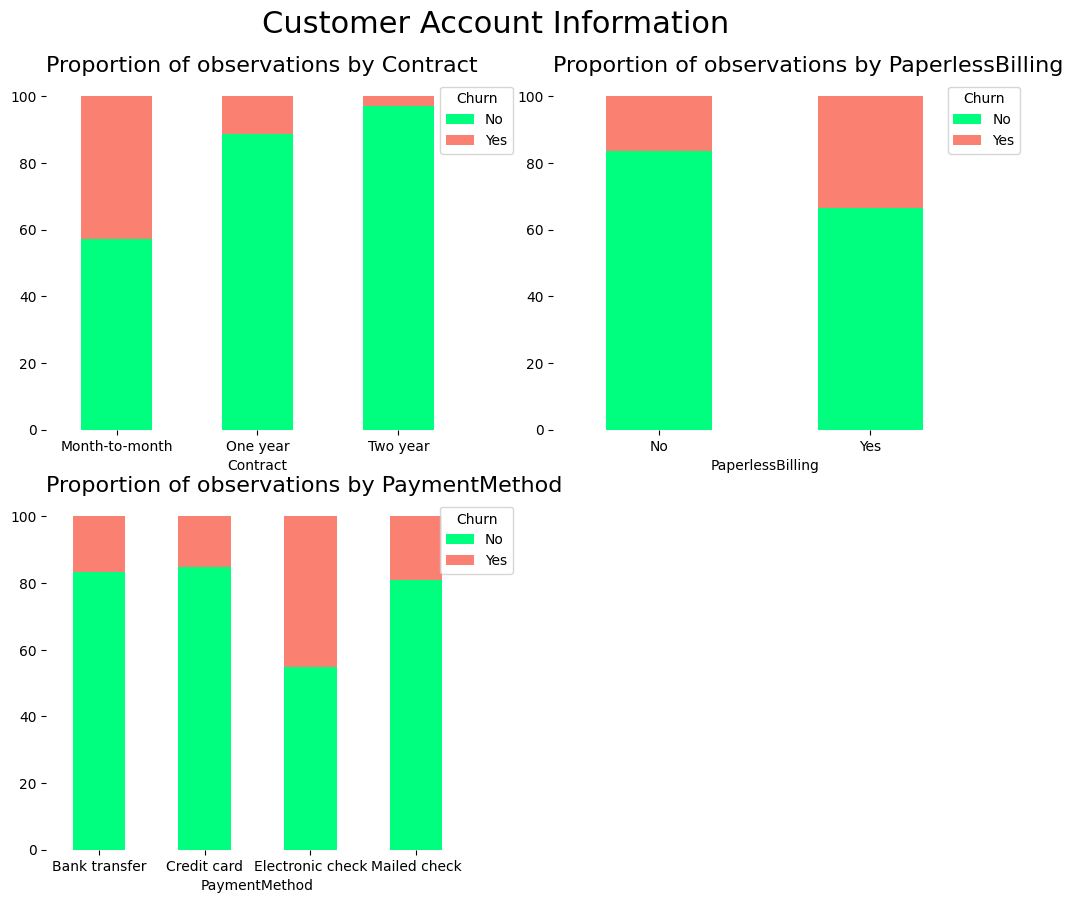

In [237]:
# customer account column names
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# stacked plot of customer account columns
percentage_stacked_plot(account_columns, 'Customer Account Information')

We can extract the following conclusions by analyzing customer account attributes:


Customers with month-to-month contracts have higher churn rates compared to clients with yearly contracts.

Customers who opted for an electronic check as paying method are more likely to leave the company.

Customers subscribed to paperless billing churn more than those who are not subscribed.

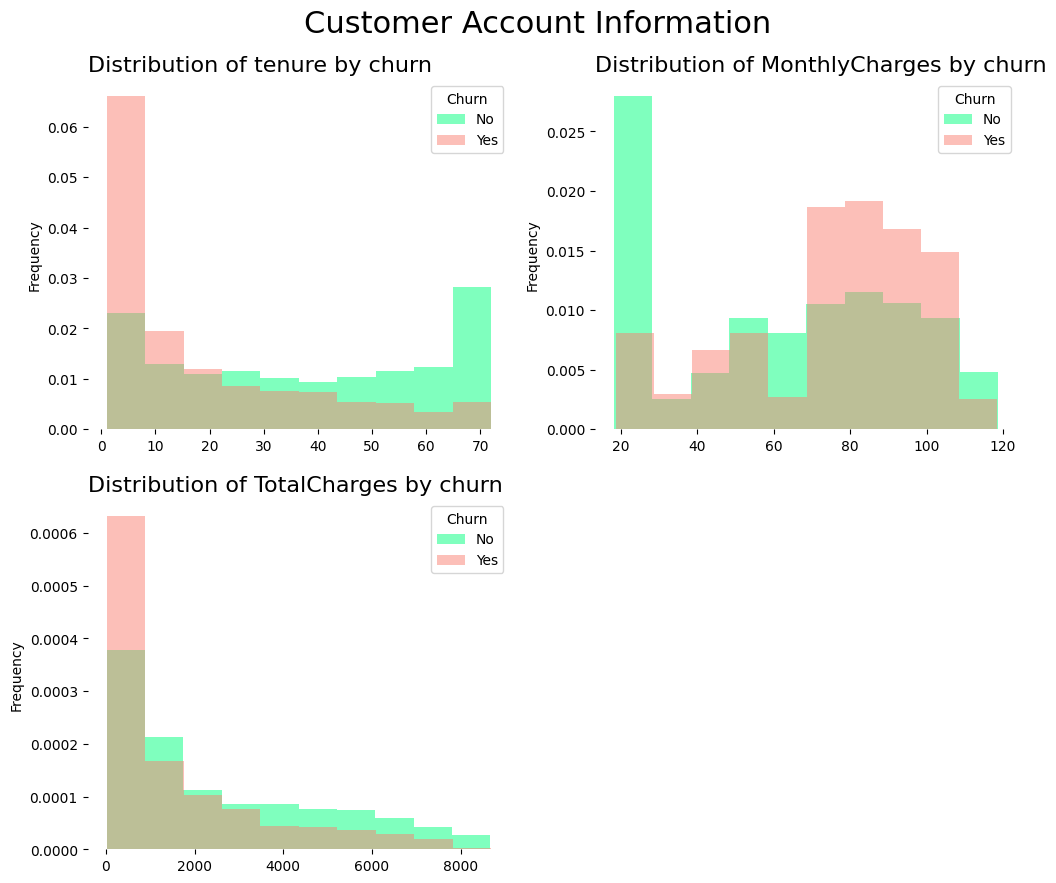

In [238]:
def histogram_plots(columns_to_plot, super_title):
    
        number_of_columns = 2
        number_of_rows = math.ceil(len(columns_to_plot)/2)

        # create a figure
        fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
        fig.suptitle(super_title, fontsize=22,  y=.95)
        

        # loop to each demographic column name to create a subplot
        for index, column in enumerate(columns_to_plot, 1):

                # create the subplot
                ax = fig.add_subplot(number_of_rows, number_of_columns, index)

                # histograms for each class (normalized histogram)
                df[df['Churn']=='No'][column].plot(kind='hist', ax=ax, density=True, 
                                                        alpha=0.5, color='springgreen', label='No')
                df[df['Churn']=='Yes'][column].plot(kind='hist', ax=ax, density=True,
                                                                alpha=0.5, color='salmon', label='Yes')
                
                # set the legend in the upper right corner
                ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                        title='Churn', fancybox=True)

                # set title and labels
                ax.set_title('Distribution of ' + column + ' by churn',
                        fontsize=16, loc='left')

                ax.tick_params(rotation='auto')

                # eliminate the frame from the plot
                spine_names = ('top', 'right', 'bottom', 'left')
                for spine_name in spine_names:
                        ax.spines[spine_name].set_visible(False)
                
# customer account column names
account_columns_numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']
# histogram of costumer account columns 
histogram_plots(account_columns_numeric, 'Customer Account Information')

We can extract the following conclusions by analyzing the histograms above:


The churn rate tends to be larger when monthly charges are high.

New customers (low tenure) are more likely to churn.

Clients with high total charges are less likely to leave the company.

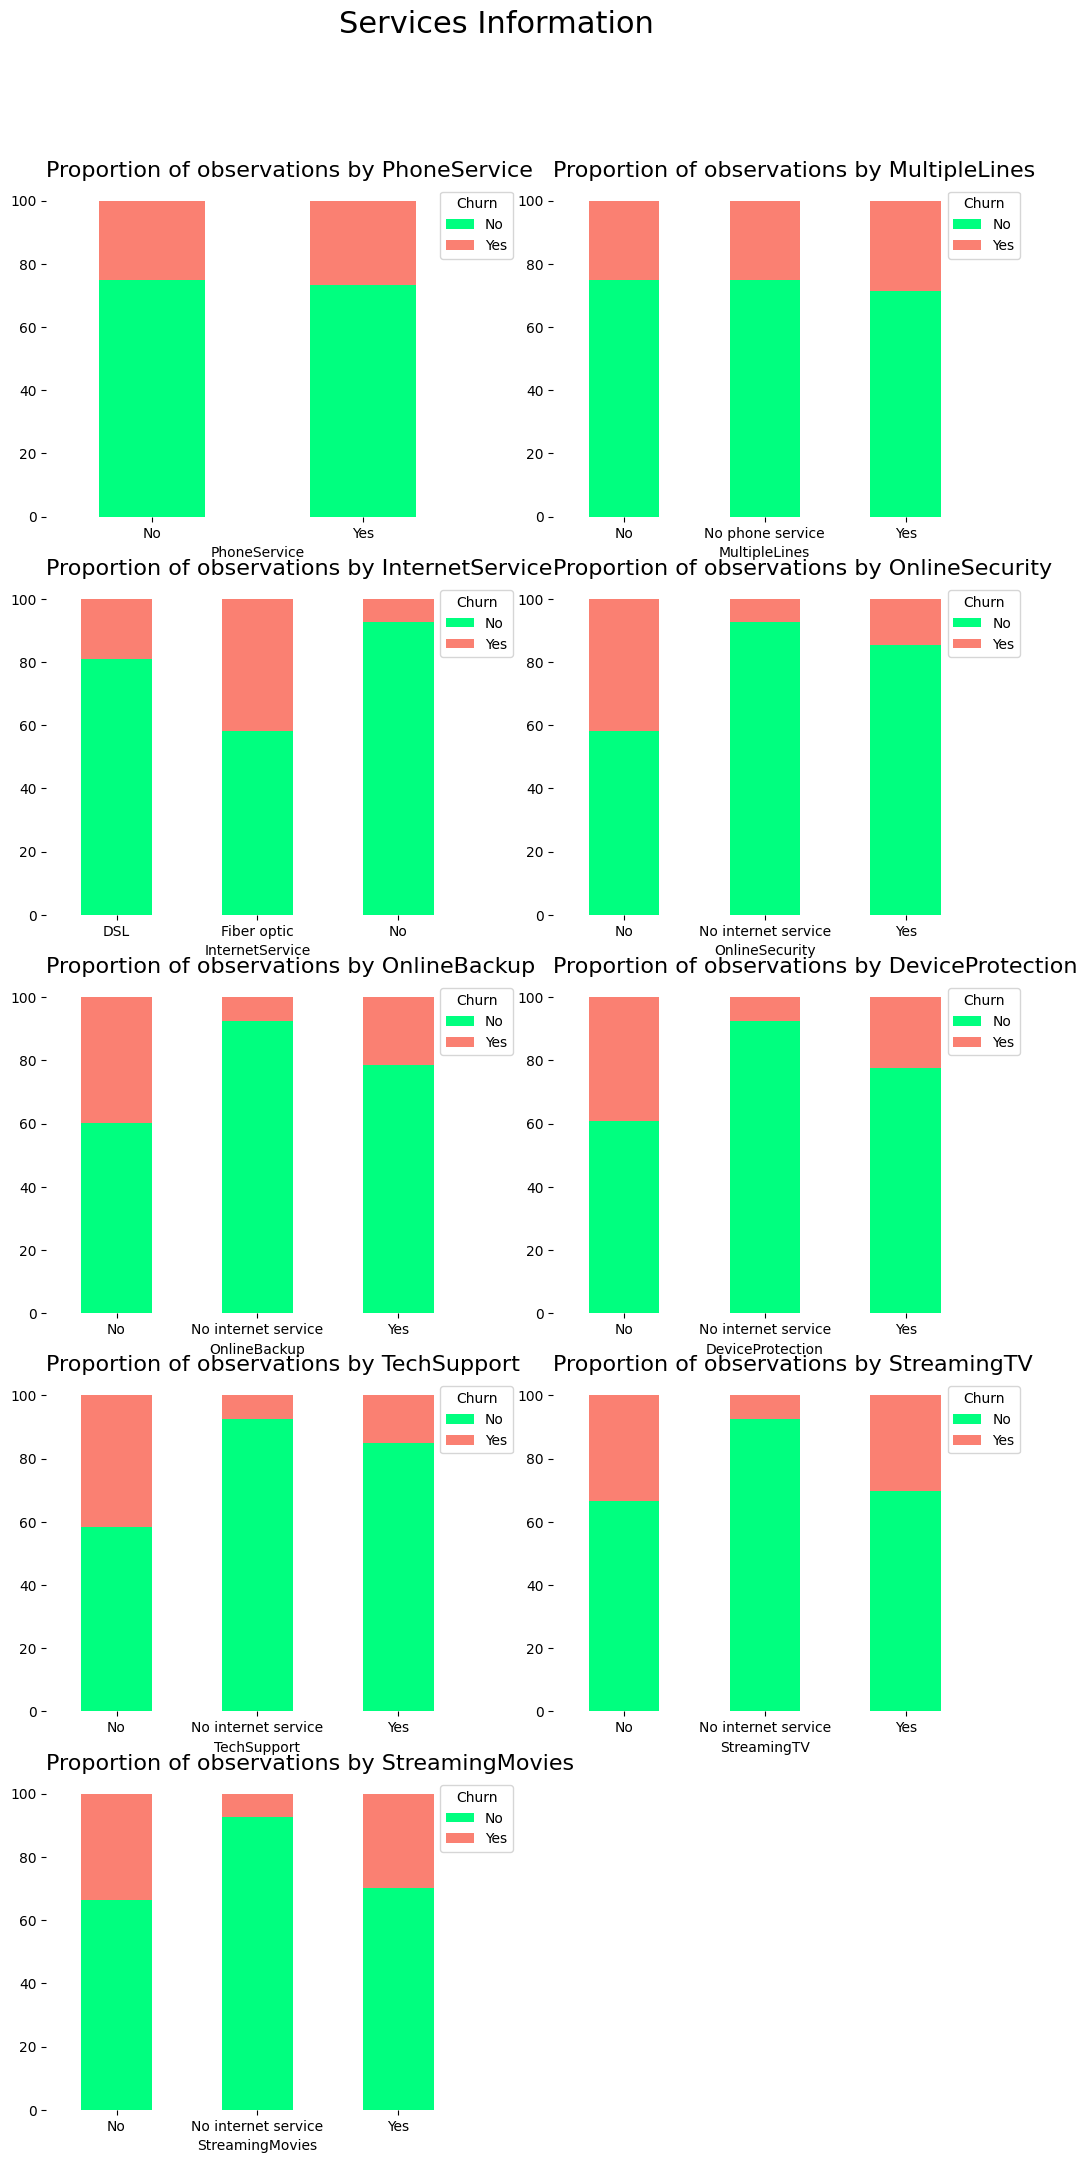

In [239]:
# services column names
services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# stacked plot of services columns
percentage_stacked_plot(services_columns, 'Services Information')

We can extract the following conclusions by evaluating services attributes:


We do not expect phone attributes (PhoneService and MultipleLines) to have significant predictive power. The percentage of churn for all classes in both independent variables is nearly the same.

Clients with online security churn less than those without it.

Customers with no tech support tend to churn more often than those with tech support.

### Feature Importance

In [240]:
# function that computes the mutual infomation score between a categorical serie and the column Churn
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, df.Churn)

# select categorial variables excluding the response variable 
categorical_variables = df.select_dtypes(include=object).drop('Churn', axis=1)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


<BarContainer object of 15 artists>

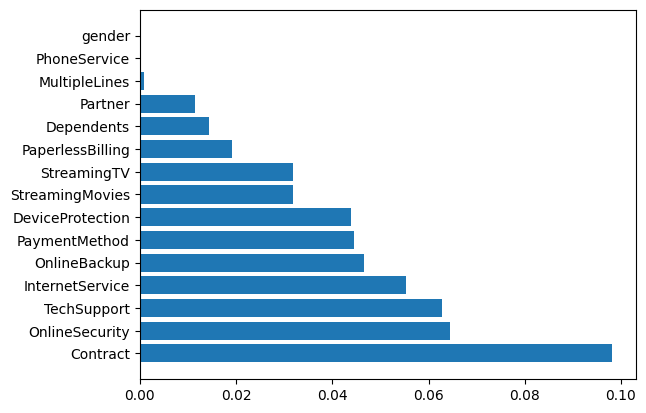

In [241]:
y=['Contract','OnlineSecurity','TechSupport','InternetService','OnlineBackup','PaymentMethod','DeviceProtection','StreamingMovies','StreamingTV','PaperlessBilling','Dependents','Partner','MultipleLines','PhoneService','gender']
x=feature_importance
plt.barh(y,x)

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


### Feature Engineering

In [243]:
for i in df.columns:
    print(f"{i}     Unique values:- {df[f'{i}'].unique()}")

gender     Unique values:- ['Female' 'Male']
SeniorCitizen     Unique values:- [0 1]
Partner     Unique values:- ['Yes' 'No']
Dependents     Unique values:- ['No' 'Yes']
tenure     Unique values:- [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService     Unique values:- ['No' 'Yes']
MultipleLines     Unique values:- ['No phone service' 'No' 'Yes']
InternetService     Unique values:- ['DSL' 'Fiber optic' 'No']
OnlineSecurity     Unique values:- ['No' 'Yes' 'No internet service']
OnlineBackup     Unique values:- ['Yes' 'No' 'No internet service']
DeviceProtection     Unique values:- ['No' 'Yes' 'No internet service']
TechSupport     Unique values:- ['No' 'Yes' 'No internet service']
StreamingTV     Unique values:- ['No' 'Yes' 'No internet service']
StreamingMovies     Unique values:- ['No' 'Yes' 'No internet ser

In [244]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['InternetService','OnlineSecurity','OnlineBackup','Contract'])
one_hot_encoded_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,DeviceProtection,TechSupport,StreamingTV,...,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,Female,0,Yes,No,1,No,No phone service,No,No,No,...,0,1,0,0,0,0,1,1,0,0
1,Male,0,No,No,34,Yes,No,Yes,No,No,...,0,0,0,1,1,0,0,0,1,0
2,Male,0,No,No,2,Yes,No,No,No,No,...,0,0,0,1,0,0,1,1,0,0
3,Male,0,No,No,45,No,No phone service,Yes,Yes,No,...,0,0,0,1,1,0,0,0,1,0
4,Female,0,No,No,2,Yes,No,No,No,No,...,0,1,0,0,1,0,0,1,0,0


In [245]:
one_hot_encoded_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year'],
      dtype='object')

In [246]:
one_hot_encoded_data.drop(['gender','PhoneService','MultipleLines','Partner','Dependents','PaperlessBilling','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaymentMethod'],inplace=True,axis=1)

In [206]:
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeniorCitizen                         7032 non-null   int64  
 1   tenure                                7032 non-null   int64  
 2   MonthlyCharges                        7032 non-null   float64
 3   TotalCharges                          7032 non-null   float64
 4   Churn                                 7032 non-null   object 
 5   InternetService_DSL                   7032 non-null   uint8  
 6   InternetService_Fiber optic           7032 non-null   uint8  
 7   InternetService_No                    7032 non-null   uint8  
 8   OnlineSecurity_No                     7032 non-null   uint8  
 9   OnlineSecurity_No internet service    7032 non-null   uint8  
 10  OnlineSecurity_Yes                    7032 non-null   uint8  
 11  OnlineBackup_No  

In [247]:
mxs=MinMaxScaler()
one_hot_encoded_data['tenure']=mxs.fit_transform(np.array(one_hot_encoded_data['tenure']).reshape(-1,1))
one_hot_encoded_data['TotalCharges']=mxs.fit_transform(np.array(one_hot_encoded_data['TotalCharges']).reshape(-1,1))
one_hot_encoded_data['MonthlyCharges']=mxs.fit_transform(np.array(one_hot_encoded_data['MonthlyCharges']).reshape(-1,1))

lb=LabelEncoder()
one_hot_encoded_data['Churn']=lb.fit_transform(np.array(one_hot_encoded_data['Churn']).reshape(-1,1))

d:\prashant\softwares\Python\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Splitting the data

In [248]:
x=one_hot_encoded_data.drop(['Churn'],axis=1)
y=one_hot_encoded_data['Churn']
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [249]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5625, 16), (1407, 16), (5625,), (1407,))

### Model Training

In [281]:
model=Sequential()
model.add(Dense(4,activation='relu',input_dim=16,kernel_initializer='uniform'))
model.add(Dense(4,activation='relu',kernel_initializer='uniform'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='uniform'))

model.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])

In [283]:
model.fit(x_train,y_train,epochs=100,validation_split=0.1,batch_size=12)

Epoch 1/100
422/422 [==============================] - 2s 4ms/step - loss: 0.4305 - accuracy: 0.7910 - val_loss: 0.4343 - val_accuracy: 0.7780
Epoch 2/100
422/422 [==============================] - 1s 3ms/step - loss: 0.4298 - accuracy: 0.7928 - val_loss: 0.4335 - val_accuracy: 0.7833
Epoch 3/100
422/422 [==============================] - 1s 3ms/step - loss: 0.4300 - accuracy: 0.7916 - val_loss: 0.4316 - val_accuracy: 0.7869
Epoch 4/100
422/422 [==============================] - 1s 3ms/step - loss: 0.4295 - accuracy: 0.7914 - val_loss: 0.4321 - val_accuracy: 0.7833
Epoch 5/100
422/422 [==============================] - 1s 3ms/step - loss: 0.4298 - accuracy: 0.7910 - val_loss: 0.4313 - val_accuracy: 0.7886
Epoch 6/100
422/422 [==============================] - 1s 3ms/step - loss: 0.4301 - accuracy: 0.7920 - val_loss: 0.4320 - val_accuracy: 0.7869
Epoch 7/100
422/422 [==============================] - 1s 3ms/step - loss: 0.4296 - accuracy: 0.7912 - val_loss: 0.4318 - val_accuracy: 0.7869

### Performance of the model

In [284]:
y_pred=model.predict(x_test)
y_pred=(y_pred>0.5)
1 in y_pred

44/44 [==============================] - 0s 2ms/step


True

In [285]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1046
           1       0.63      0.49      0.55       361

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.79      1407



In [286]:
model.save("model.h5")